**🔷 Title: Image Processing Operations: Brightness, Contrast, Thresholding & Bitwise with OpenCV**

✅ This script:

Reads online images from URLs

Resizes images

Adjusts brightness and contrast

Applies simple and adaptive thresholding

Performs bitwise operations (AND, OR) between two images

Displays results step-by-step

**Author: Wasiq**

In [1]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

In [3]:
url = 'https://ultralytics.com/images/zidane.jpg'

In [4]:
res=urllib.request.urlopen(url)
print(res)

# resp contains binary data of the image.

In [5]:
image=np.asarray(bytearray(res.read()),dtype=np.uint8)


# ✔️ Converts the binary data to a numpy array of type uint8 (image pixels).

# resp.read() reads all data from URL response.
# bytearray(...) converts data into byte array.
# np.asarray(...) converts it to a numpy array.

In [6]:
img=cv2.imdecode(image,cv2.IMREAD_COLOR)

# Decodes the numpy array into an actual image format readable by OpenCV.
# cv2.imdecode converts encoded image data (jpg/png) into an OpenCV BGR image array.

In [7]:
print(img.shape)

(720, 1280, 3)


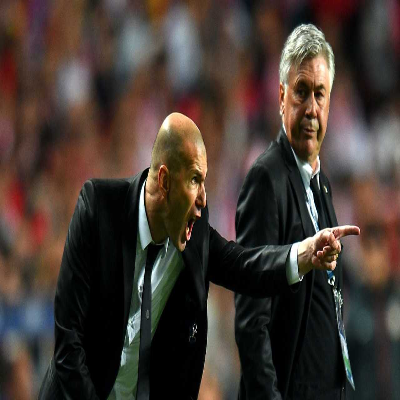

In [10]:
resized_img=cv2.resize(img,(400,400),interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_img)

# Brightness and Contrast

In [15]:
new_vlaue=np.ones(resized_img.shape)*50
print(new_vlaue)

[[[50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]
  ...
  [50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]]

 [[50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]
  ...
  [50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]]

 [[50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]
  ...
  [50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]]

 ...

 [[50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]
  ...
  [50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]]

 [[50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]
  ...
  [50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]]

 [[50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]
  ...
  [50. 50. 50.]
  [50. 50. 50.]
  [50. 50. 50.]]]


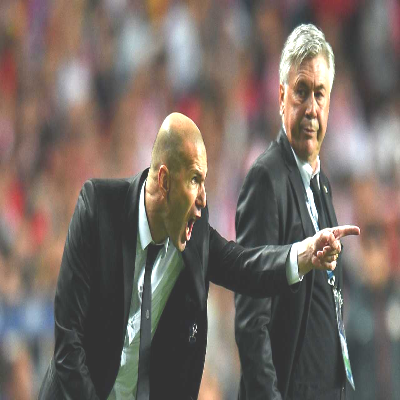

In [18]:
brighter=np.clip(np.add(resized_img,new_vlaue),0,255).astype(np.uint8)
cv2_imshow(brighter)

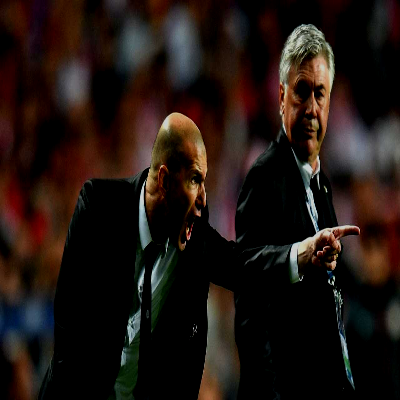

In [20]:
darker=np.subtract(resized_img,new_vlaue)
cv2_imshow(darker)

In [21]:
low_contrat_value=np.ones(resized_img.shape)*0.8
high_contrat_value=np.ones(resized_img.shape)*1.2

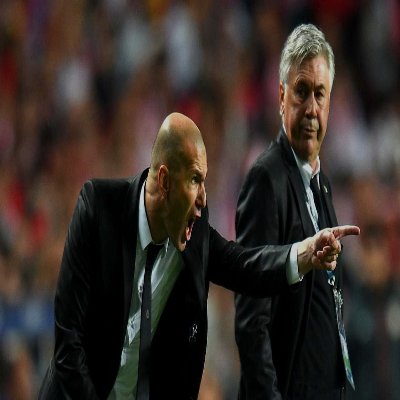

In [27]:
high_contrast=np.clip(np.multiply(np.float64(resized_img),low_contrat_value),0,255).astype(np.uint8)
cv2_imshow(high_contrast)

# **Thresholding**

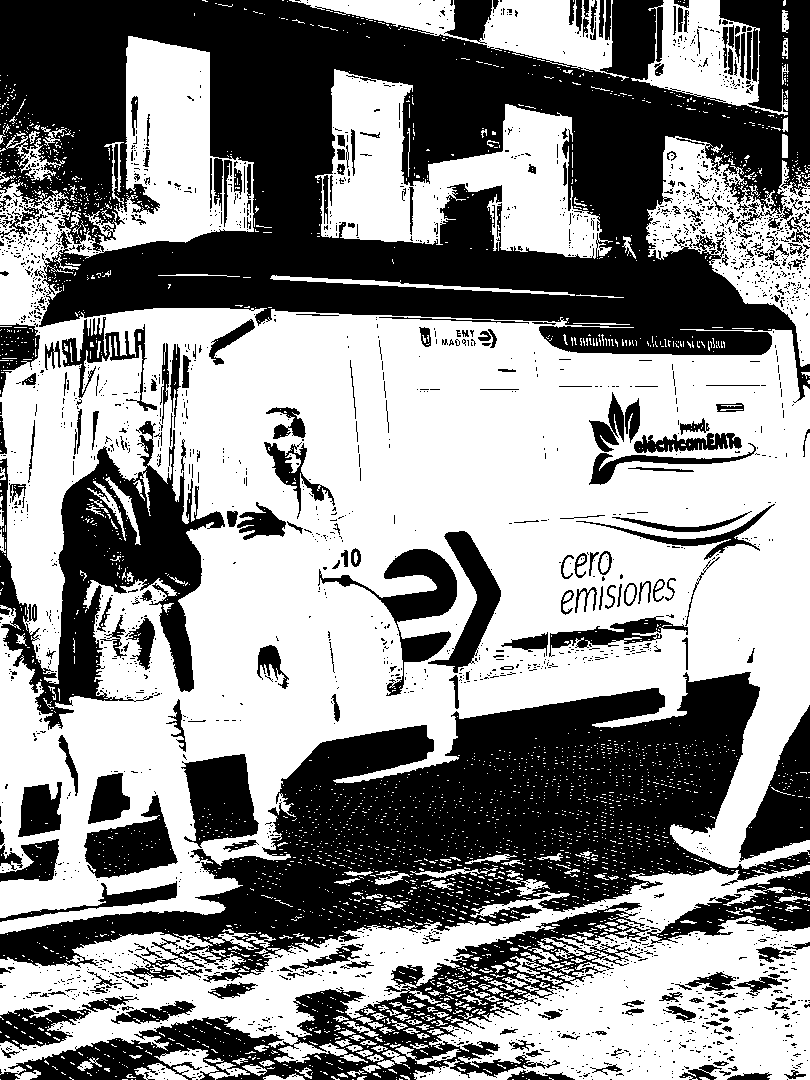

In [39]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur=cv2.GaussianBlur(gray,(5,5),0)
_,img_thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
cv2_imshow(img_thresh)

In [41]:
addptive_thesholding=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,2)

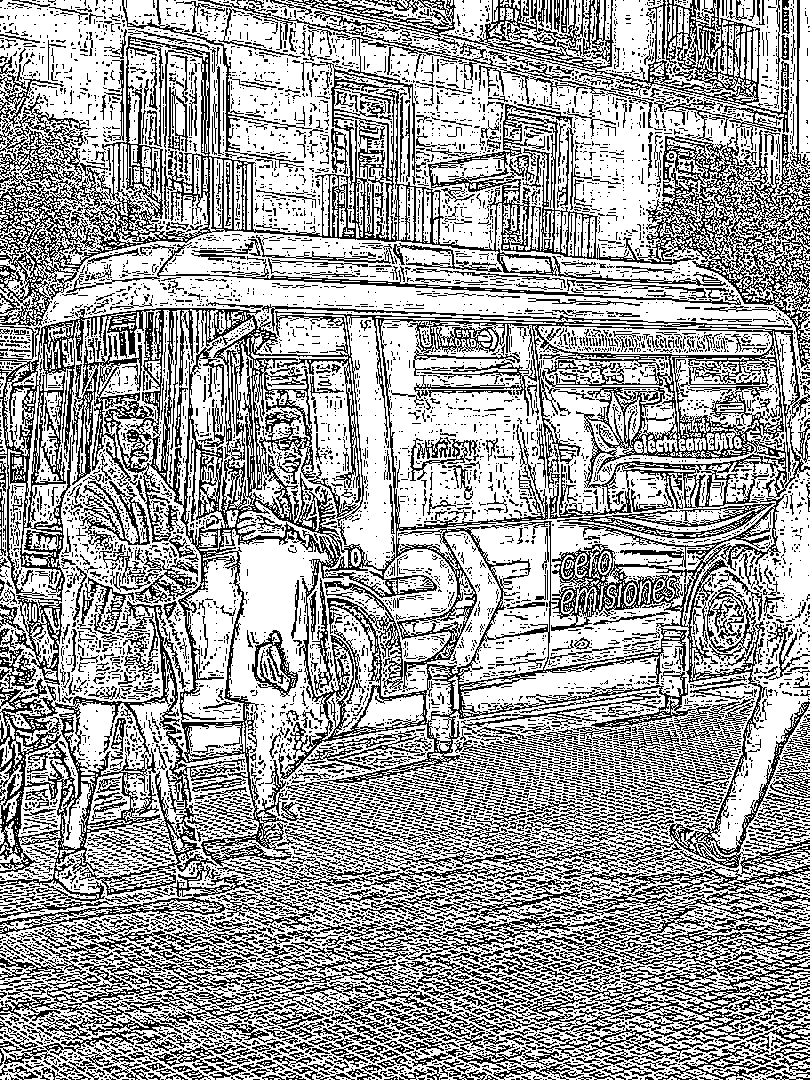

In [42]:
cv2_imshow(addptive_thesholding)

# Bitwaise Operations

In [31]:
url = 'https://ultralytics.com/images/bus.jpg'
res=urllib.request.urlopen(url)
image=np.asarray(bytearray(res.read()),dtype=np.uint8)
img=cv2.imdecode(image,cv2.IMREAD_COLOR)
img2=cv2.resize(img,(400,400),interpolation=cv2.INTER_CUBIC)

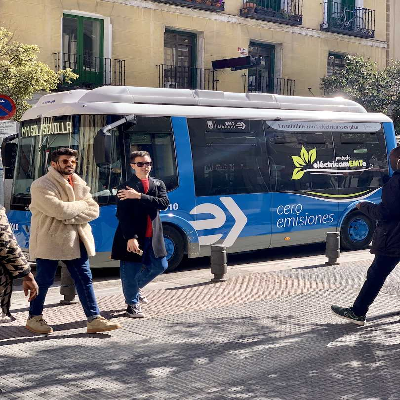

In [32]:
cv2_imshow(img2)

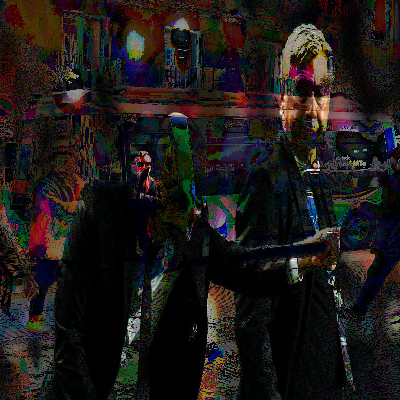

In [33]:
and_opr=cv2.bitwise_and(resized_img,img2,mask=None)
cv2_imshow(and_opr)

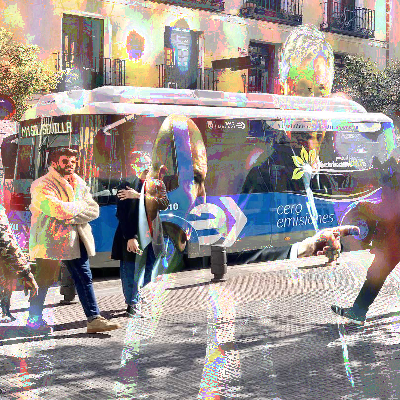

In [34]:
or_oper=cv2.bitwise_or(resized_img,img2)
cv2_imshow(or_oper)